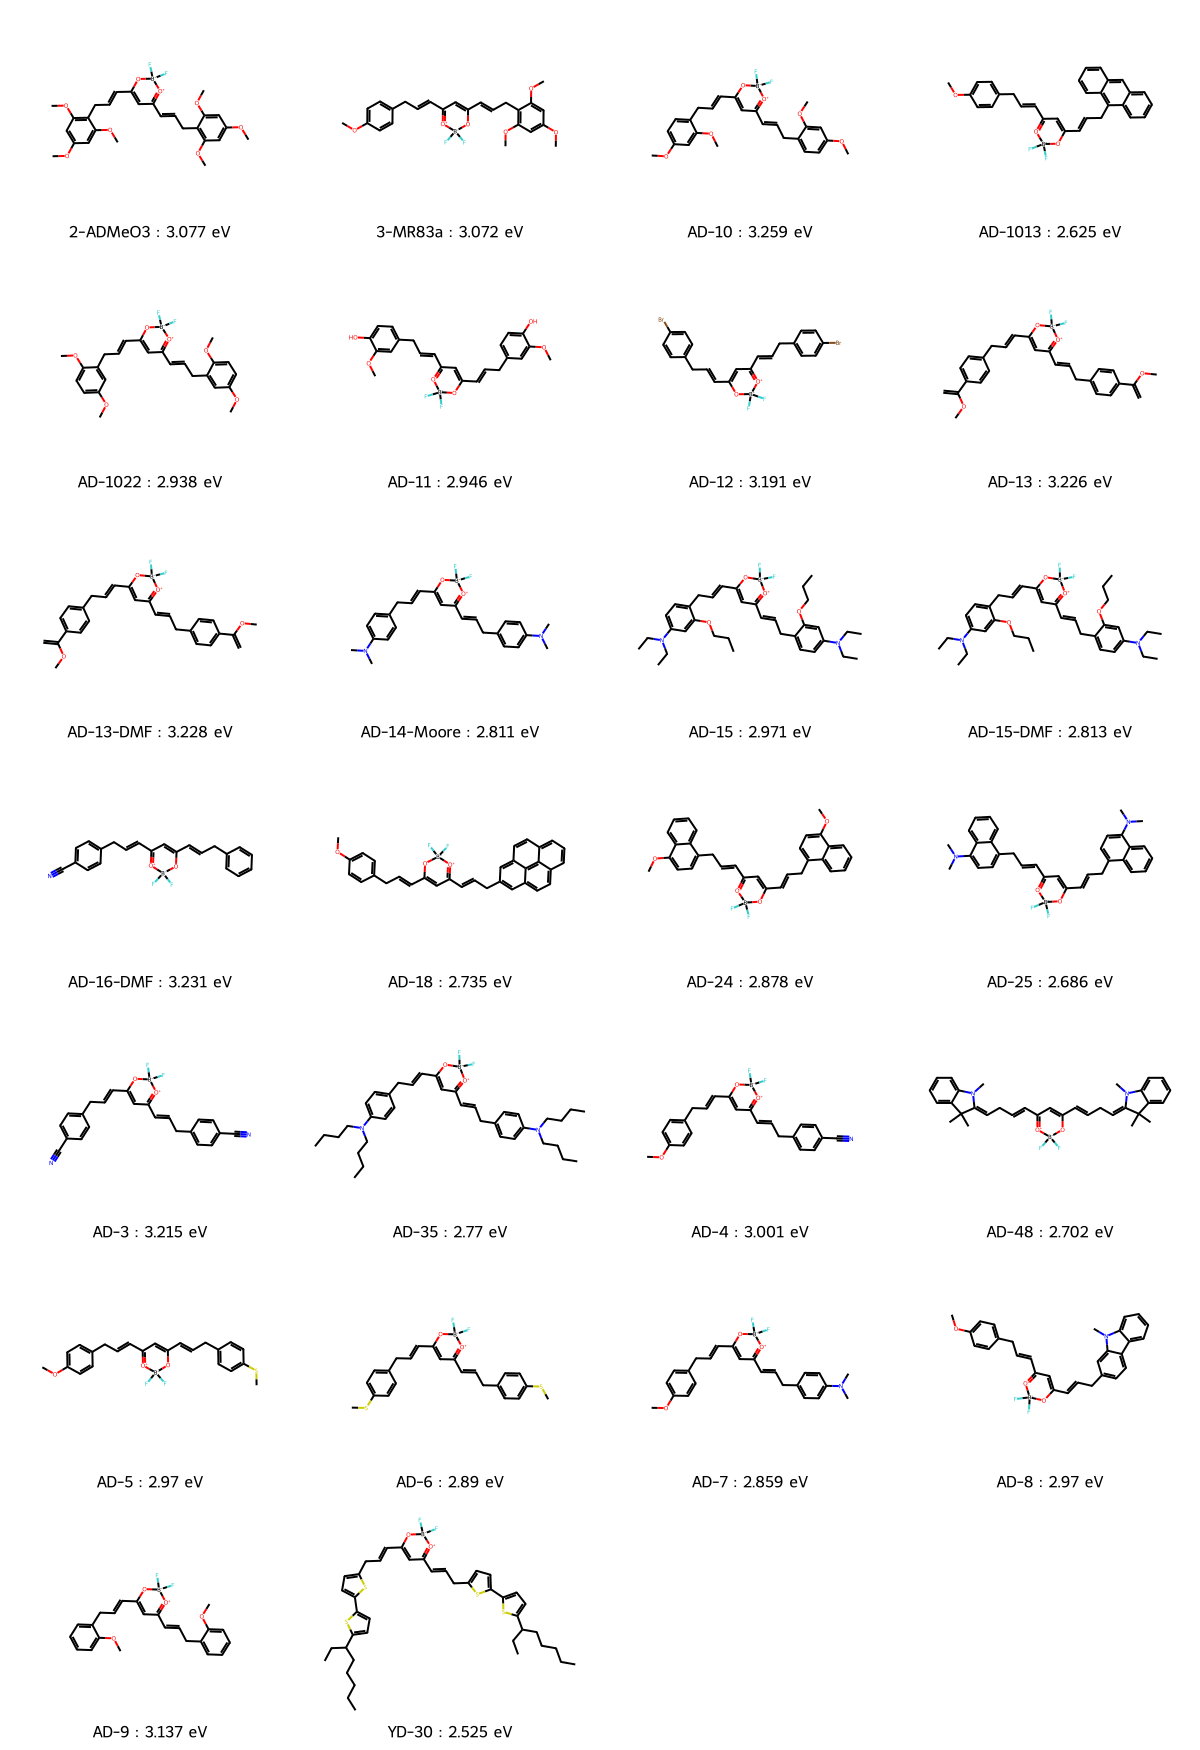

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors

cucumin_varients = (
    "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1ccccc1cc3ccccc23)=C4)cc5",
    "COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)=[O+][B-](F)(F)O2)c3",
    "COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+][B-](F)(F)O2)ccc3O",
    "F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc(Br)cc2)=[O+]3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C2(C)C)=[O+][B-](F)(F)O3)C(C)(C)c4ccccc45",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(SC)cc1)=C2)cc3",
    "CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2c1ccccc1n(C)c2c3)=C4)cc5",
    "COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B-](F)(F)O3",
    "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
)

molecule_names = ['2-ADMeO3', '3-MR83a', 'AD-10', 'AD-1013', 'AD-1022', 'AD-11', 'AD-12', 'AD-13', 'AD-13-DMF', 'AD-14-Moore', 'AD-15', 'AD-15-DMF', 'AD-16-DMF', 'AD-18', 'AD-24', 'AD-25', 'AD-3', 'AD-35', 'AD-4', 'AD-48', 'AD-5', 'AD-6', 'AD-7', 'AD-8', 'AD-9', 'YD-30']
homo_lumo_gap = [3.077, 3.072, 3.259, 2.625, 2.938, 2.946, 3.191, 3.226, 3.228, 2.811, 2.971, 2.813, 3.231, 2.735, 2.878, 2.686, 3.215, 2.77, 3.001, 2.702, 2.97, 2.89, 2.859, 2.97, 3.137, 2.525]

molecules = [Chem.MolFromSmiles(smiles) for smiles in cucumin_varients]
mws = [round(Descriptors.MolWt(mol),3) for mol in molecules]
logp = [Descriptors.MolLogP(mol) for mol in molecules]
legends = [f"{name} : {gap} eV" for name, gap in zip(molecule_names, homo_lumo_gap)]
Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300,250), legends=legends)

In [2]:
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints
def generate_morgan_fingerprint(smiles, radius=4, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality = True)
        return list(fingerprint)
    else:
        return None

data = {
    'Molecule': molecule_names,
    'Molecular Weight': mws,
    'LogP': logp,
    'Homo-Lumo Gap (eV)': homo_lumo_gap,
    'Smiles': cucumin_varients
}

cucumin_df = pd.DataFrame(data)

cucumin_df['Morgan_Fingerprint'] = cucumin_df['Smiles'].apply(generate_morgan_fingerprint)
fingerprint_df = pd.DataFrame(cucumin_df['Morgan_Fingerprint'].tolist(), columns=[f'morgan_{i}' for i in range(1024)])
cucumin_df_new = pd.concat([cucumin_df, fingerprint_df], axis=1)
cucumin_df_new.drop(columns=['Morgan_Fingerprint'], inplace=True)
cucumin_df_new.head(4)

,Molecule,Molecular Weight,LogP,Homo-Lumo Gap (eV),Smiles,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,2-ADMeO3,532.345,5.0293,3.077,COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3-MR83a,472.293,5.0121,3.072,COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,AD-10,472.293,5.0121,3.259,COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,AD-1013,482.335,7.2927,2.625,COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/havard-smile-opv/main/Non-fullerene%20small-molecules%20acceptors.csv')
newdata = data.drop(columns=['index', 'inchikey',  'HOMO_calc', 'LUMO_calc', 'LUMO_calib',
       'LUMO_calib_stds', 'HOMO_calib', 'HOMO_calib_stds', 'molW',
       'PCE_calc', 'Voc_calc', 'Jsc_calc', 'FF_calc', 'EQE_calc',
       'PCE_calib', 'Voc_calib', 'Jsc_calib', 'FF_calib', 'EQE_calib',
       'PCE_cdiff', 'PCE_calib_plus'], axis=1)
newdata['Morgan_Fingerprint'] = newdata['smiles'].apply(generate_morgan_fingerprint)
fingerprint_new = pd.DataFrame(newdata['Morgan_Fingerprint'].tolist(), columns=[f'morgan_{i}' for i in range (1024)])
newdata_fps = pd.concat([newdata, fingerprint_new], axis = 1)
newdata_fps.drop(columns = ['Morgan_Fingerprint'], inplace = True)
newdata_fps.head()

,smiles,GAP_calib,GAP_calc,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,3.109059,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,2.634680,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,2.825687,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,3.342626,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,3.304822,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [20]:
# for quick model evaluation
newdata_fps_reduced = newdata_fps.sample(frac=0.1, random_state=42)
newdata_fps_reduced

from sklearn.model_selection import train_test_split

X = newdata_fps.iloc[:,3:]
y = newdata_fps["GAP_calib"]

reg1 = pd.concat([X,y], axis = 1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y to float32
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

In [23]:
import tensorflow as tf

model = tf.keras.Sequential([
    # Dense layer for the input layer and hidden layers, dropout layer for regularization
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(1024,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)  # Output layer (Regression)
])

# Compile the model
from tensorflow.keras import metrics

model.compile(optimizer='adam', loss='mean_squared_error', 
              metrics=[tf.keras.metrics.RootMeanSquaredError(), 
                       tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

# Display the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_42 (Dropout)        (None, 1024)              0         
                                                                 
 dense_50 (Dense)            (None, 512)               524800    
                                                                 
 dropout_43 (Dropout)        (None, 512)               0         
                                                                 
 dense_51 (Dense)            (None, 256)               131328    
                                                                 
 dropout_44 (Dropout)        (None, 256)               0         
                                                                 
 dense_52 (Dense)            (None, 128)              

In [28]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=16, batch_size=64, validation_data=(X_test, y_test), verbose=1, 
                    steps_per_epoch=500,
                    validation_steps=300)

Epoch 1/16
500/500 [==============================] - 9s 18ms/step - loss: 0.0311 - root_mean_squared_error: 0.1762 - mean_absolute_error: 0.1301 - mean_squared_error: 0.0311 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2118 - val_mean_absolute_error: 0.1486 - val_mean_squared_error: 0.0449
Epoch 2/16
500/500 [==============================] - 8s 16ms/step - loss: 0.0297 - root_mean_squared_error: 0.1723 - mean_absolute_error: 0.1265 - mean_squared_error: 0.0297
Epoch 3/16
500/500 [==============================] - 8s 16ms/step - loss: 0.0309 - root_mean_squared_error: 0.1758 - mean_absolute_error: 0.1268 - mean_squared_error: 0.0309
Epoch 4/16
500/500 [==============================] - 8s 16ms/step - loss: 0.0327 - root_mean_squared_error: 0.1808 - mean_absolute_error: 0.1255 - mean_squared_error: 0.0327
Epoch 5/16
500/500 [==============================] - 8s 16ms/step - loss: 0.0313 - root_mean_squared_error: 0.1769 - mean_absolute_error: 0.1254 - mean_squared_error: 0.0313
E

In [31]:
from sklearn.metrics import r2_score

test_loss, rmse, mae, mse = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Test Loss:", test_loss)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

321/321 [==============================] - 1s 4ms/step
Test Loss: 0.04310296103358269
Root Mean Squared Error (RMSE): 0.2076125293970108
Mean Absolute Error (MAE): 0.14549824595451355
Mean Squared Error (MSE): 0.04310296103358269
R^2 Score: 0.884697546628472
